# Customer Personality Analysis

O objetivo deste notebook é categorizar os diferentes tipos de clientes contidos na base de dados através do agrupamento de similares (Clustering).

## 1. Dados

**Dados Pessoais**
- ID: ID do cliente
- Year_Birth: Ano de nascimento do cliente
- Education: Nível educacional do cliente
- Marital_Status: Status de relacionamento do cliente
- Income: Renda anual do cliente
- Kidhome: Número de filhos crianças
- Teenhome: Número de filhos adolescentes
- Dt_Customer: Data de inscrição do cliente
- Recency: Número de dias desde a última compra
- Complain: 1 se o cliente registrou reclamações nos último dois anos, 0 se não

**Produtos**
- MntWines: Total gasto em vinho nos últimos dois anos
- MntFruits: Total gasto em frutas nos últimos dois anos
- MntMeatProducts: Total gasto em carne nos últimos dois anoss
- MntFishProducts: Total gasto em peixe nos últimos dois anos
- MntSweetProducts: Total gasto em doces nos últimos dois anos
- MntGoldProds: Total gasto em produtos 'gold' nos últimos dois anos

**Promoções**
- NumDealsPurchases: Número de compras feitas com desconto
- AcceptedCmp1: 1 se o cliente aceitou a oferta na primeira campanha, 0 se não
- AcceptedCmp2: 1 se o cliente aceitou a oferta na segunda campanha, 0 se não
- AcceptedCmp3: 1 se o cliente aceitou a oferta na terceira campanha, 0 se não
- AcceptedCmp4: 1 se o cliente aceitou a oferta na quarta campanha, 0 se não
- AcceptedCmp5: 1 se o cliente aceitou a oferta na quinta campanha, 0 se não
- Response: 1 se o cliente aceitou a oferta na última campanha, 0 se não

**Companhia**
- NumWebPurchases: Número de compras realizadas através do website
- NumCatalogPurchases: Número de compras realizadas através de um catálogo
- NumStorePurchases: Número de compras realizadas diretamente na loja
- NumWebVisitsMonth: Número de visitas ao website no último mês

**Importando as bibliotecas necessárias**

In [1]:
import pandas as pd #manipulação dos dados
import numpy as np #operações matemáticas
import seaborn as sns #gráficos
import matplotlib.pyplot as plt #gráficos
import datetime #valores de data

**Carregando a base de dados**

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

**Algumas informações**

Primeiramente, serão mostradas as primeiras 5 linhas da tabela para que se tenha uma ideia dos valores

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Aqui estão mostrados a quantidade de valores contido em cada coluna e o tipo de dado (numérico ou não)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Procurando por valores nulos e os descartando**

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

A coluna 'Income' apresenta 24 valores nulos que devem ser excluídos

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

**Checando algumas estatísticas das colunas com valores numéricos**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


### 1.1 Manipulando os dados

Aqui, serão checadas as colunas e feitas as mudanças necessárias

A coluna de 'Marital_Status' possui alguns valores descartáveis, como mostrado:

In [9]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Excluindo os 3 último valores:

In [10]:
df = df[(df['Marital_Status'] != 'Alone') & (df['Marital_Status'] != 'Absurd') & (df['Marital_Status'] != 'YOLO')]
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

A seguir, será verificado a coluna de nível de educação dos clientes:

In [11]:
df['Education'].value_counts()

Graduation    1114
PhD            478
Master         363
2n Cycle       200
Basic           54
Name: Education, dtype: int64

**A coluna 'Dt_Customer' apresenta a data de inscrição do cliente**

Os valores serão passados para a quantidade de anos desde a inscrição:

In [12]:
df['Dt_Customer'].value_counts()

31-08-2012    12
14-02-2013    11
12-09-2012    11
20-08-2013    10
22-05-2014    10
              ..
08-12-2012     1
05-09-2012     1
29-01-2014     1
14-05-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [14]:
def f(date):
    date.year
    return 2022 - date.year

In [15]:
df['Dt_Customer'] = df['Dt_Customer'].apply(f)

Agora sim! Os valores estão em quantidade de anos:

In [16]:
df['Dt_Customer']

0       10
1        8
2        9
3        8
4        8
        ..
2235     9
2236     8
2237     8
2238     8
2239    10
Name: Dt_Customer, Length: 2209, dtype: int64

O nome será mudado para 'Years' para manter condizente com os novos valores:

In [17]:
df['Dt_Customer'].value_counts()
df.rename(columns = {'Dt_Customer': 'Years'}, inplace = True)

**A coluna 'Year_Birth' mostra os anos de nascimento dos clientes**

O nome será agora mudado para 'Age' e receberá o valor das idades dos clientes em 2022:

In [18]:
df['Year_Birth'] = 2022 - df['Year_Birth']
df.rename(columns = {'Year_Birth': 'Age'}, inplace = True)

In [19]:
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2209, dtype: int64

A partir das colunas "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts" e "MntGoldProds" será gerada uma nova coluna com o valor total gasto em produtos pelos clientes ('Total_Spent'):

In [20]:
df["Total_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

O número de compras totais ('Total_Purchases') será a soma dos atributos de tipo de compra:

In [21]:
df["Total_Purchases"] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

As colunas 'Kidhome' e 'Teenhome' serão somadas e darão lugar à coluna com o número de filhos ('Child'):

In [22]:
df['Child'] = df['Kidhome'] + df['Teenhome']

In [23]:
df = df.drop(['Kidhome','Teenhome'], axis=1)

As colunas 'Z_CostContact' e 'Z_Revenue' não possuem explicação dentro das informações contidas sobre os dados e apresentam valores únicos para todos os clientes. Assim, juntamente com a coluna de ID do cliente, elas serão descartadas.

In [24]:
df['Z_CostContact'].value_counts()

3    2209
Name: Z_CostContact, dtype: int64

In [25]:
df['Z_Revenue'].value_counts()

11    2209
Name: Z_Revenue, dtype: int64

In [26]:
df = df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis=1)

Informações sobre o formato final dos dados:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2209 non-null   int64  
 1   Education            2209 non-null   object 
 2   Marital_Status       2209 non-null   object 
 3   Income               2209 non-null   float64
 4   Years                2209 non-null   int64  
 5   Recency              2209 non-null   int64  
 6   MntWines             2209 non-null   int64  
 7   MntFruits            2209 non-null   int64  
 8   MntMeatProducts      2209 non-null   int64  
 9   MntFishProducts      2209 non-null   int64  
 10  MntSweetProducts     2209 non-null   int64  
 11  MntGoldProds         2209 non-null   int64  
 12  NumDealsPurchases    2209 non-null   int64  
 13  NumWebPurchases      2209 non-null   int64  
 14  NumCatalogPurchases  2209 non-null   int64  
 15  NumStorePurchases    2209 non-null   i

### 1.2 Pré-processamento dos dados

Nesta etapa será feita a substituição dos valores não numéricos por valores binários (dummies), bem como a padronização dos valores através do StandardScaler para que fiquem em uma mesma ordem de grandeza:

In [28]:
data = pd.get_dummies(df)

In [29]:
data.head()

,Age,Income,Years,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,65,58138.0,10,58,635,88,546,172,88,88,...,0,0,1,0,0,0,0,1,0,0
1,68,46344.0,8,38,11,1,6,2,1,6,...,0,0,1,0,0,0,0,1,0,0
2,57,71613.0,9,26,426,49,127,111,21,42,...,0,0,1,0,0,0,0,0,1,0
3,38,26646.0,8,26,11,4,20,10,3,5,...,0,0,1,0,0,0,0,0,1,0
4,41,58293.0,8,94,173,43,118,46,27,15,...,0,0,0,0,1,0,1,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

Escalonando e mostrando os valores:

In [32]:
data = scaler.fit_transform(data)

In [33]:
data

array([[ 0.98558604,  0.23395688,  1.50244179, ...,  1.9209428 ,
        -0.59181458, -0.18876061],
       [ 1.23604538, -0.23419328, -1.41911975, ...,  1.9209428 ,
        -0.59181458, -0.18876061],
       [ 0.31769447,  0.76883252,  0.04166102, ..., -0.52057771,
         1.68971842, -0.18876061],
       ...,
       [-1.01808869,  0.18803101, -1.41911975, ..., -0.52057771,
        -0.59181458, -0.18876061],
       [ 1.06907249,  0.67483731, -1.41911975, ..., -0.52057771,
         1.68971842, -0.18876061],
       [ 1.23604538,  0.02480958,  1.50244179, ..., -0.52057771,
        -0.59181458, -0.18876061]])

### 1.3 Principal Component Analysis (PCA)

Por conta da grande quantidade de colunas presentes, se faz necessária uma redução. A técnica do PCA gera novos atributos através da combinação dos valores atuais entre si, reduzindo a quantidade e facilitando o processamento.

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

In [35]:
data_pca = pca.fit_transform(data)

In [59]:
pca.explained_variance_ratio_.sum()
#o quanto as novas variáveis explicam a variância dos dados

0.8723215843500978

## 2. Agrupamento (Clustering)

Através do modelo k-Means Clustering, os clientes similares serão agrupados. Este agrupamento é baseado na distância entre os pontos ao centro de cada um dos grupos (clusters). O número ideal de clusters para esse dataset será determinado a seguir

### 2.1 Elbow Method

O Elbow Method ou 'Método do cotovelo' consiste em plotar o número de clusters em função da soma das distâncias ao quadrado dos pontos ao centro do cluster. Quando for observado um 'cotovelo' (variação na inclinação da reta), o valor em questão será o mais adequado para o número de clusters.

In [37]:
from sklearn.cluster import KMeans

In [38]:
lista = []

for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(data_pca)
    lista.append(model.inertia_) #soma das distancias ao quadrado
    print(i)

1
2
3
4
5
6
7
8
9


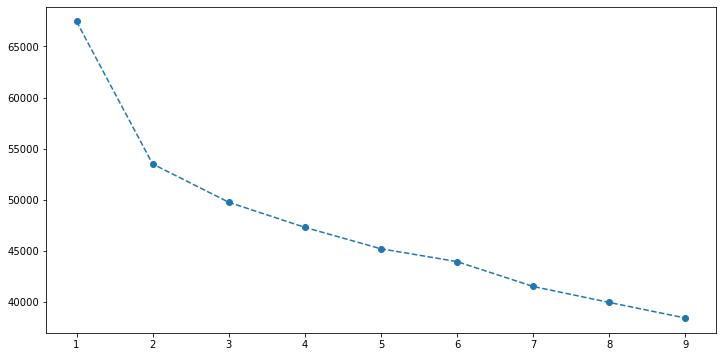

In [39]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10),lista,'o--')

**O número de clusters escolhido será 2**

In [40]:
cluster_model = KMeans(n_clusters=2)

In [41]:
clusters = cluster_model.fit_predict(data_pca)

In [42]:
clusters

array([0, 1, 0, ..., 0, 0, 1])

**Incluindo a coluna de clusters aos dados. Agora será mostrado de qual cluster cada cliente faz parte!**

In [43]:
df['Cluster'] = clusters

In [44]:
df.head()

,Age,Education,Marital_Status,Income,Years,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Total_Purchases,Child,Cluster
0,65,Graduation,Single,58138.0,10,58,635,88,546,172,...,0,0,0,0,0,1,1617,25,0,0
1,68,Graduation,Single,46344.0,8,38,11,1,6,2,...,0,0,0,0,0,0,27,6,2,1
2,57,Graduation,Together,71613.0,9,26,426,49,127,111,...,0,0,0,0,0,0,776,21,0,0
3,38,Graduation,Together,26646.0,8,26,11,4,20,10,...,0,0,0,0,0,0,53,8,1,1
4,41,PhD,Married,58293.0,8,94,173,43,118,46,...,0,0,0,0,0,0,422,19,1,1


**Verificando a quantidade de clientes em cada cluster**

In [45]:
df['Cluster'].value_counts()

1    1295
0     914
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Cluster'>

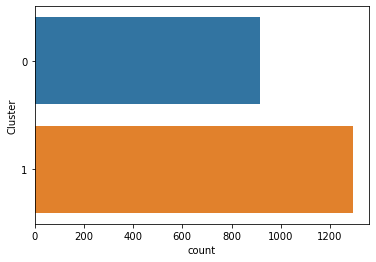

In [46]:
sns.countplot(data=df, y='Cluster')

## 3. Analisando os Clusters

Aqui serão mostrados graficamente os atributos numéricos e não-numéricos

**Características não-numéricas dos clientes**

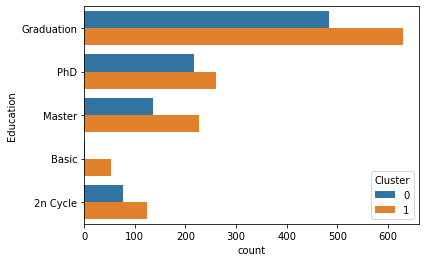

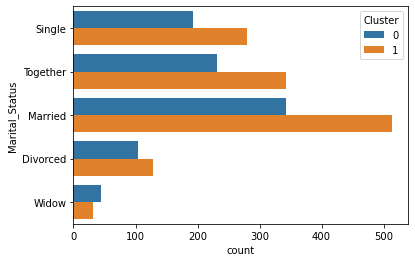

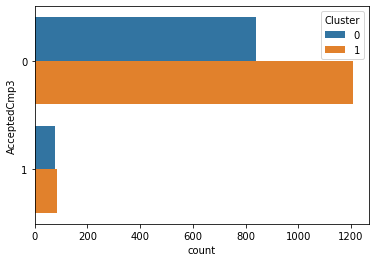

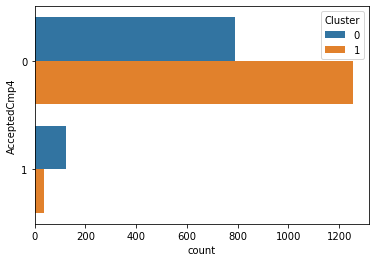

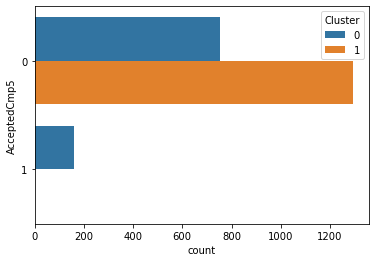

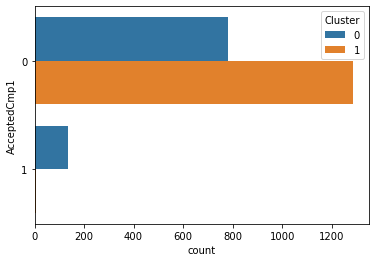

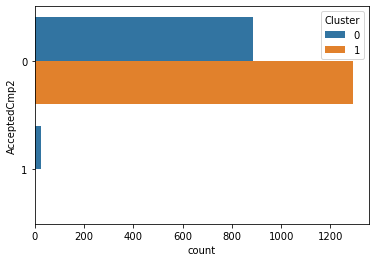

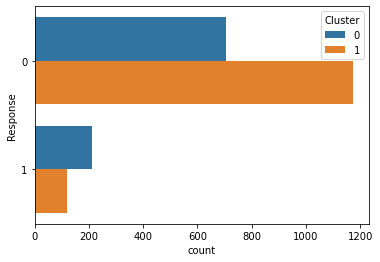

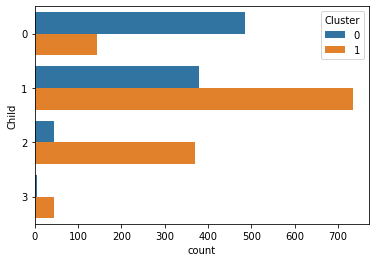

In [48]:
colunas = [1, 2, 17, 18, 19, 20, 21, 23, 26]
for i in colunas:
    plt.figure()
    sns.countplot(data=df, y=df.columns[i], hue='Cluster')

**Características numéricas dos clientes**

Aqui está disposto o gráfico de renda anual em função do valor total gasto pelos clientes:

(0.0, 100000.0)

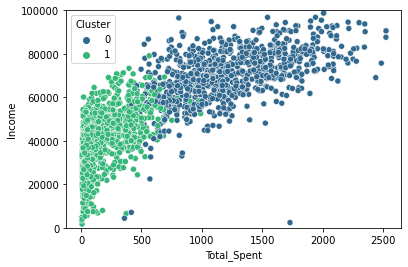

In [49]:
sns.scatterplot(data=df, y='Income', x='Total_Spent', hue='Cluster',palette='viridis')
plt.ylim(0,100000)

In [50]:
df[df['Cluster']==0]['Income'].mean(), df[df['Cluster']==1]['Income'].mean()

(71695.81181619257, 38515.03861003861)

**A partir daqui serão mostrados os demais atributos para cada cluster:**

**Gastos Totais**

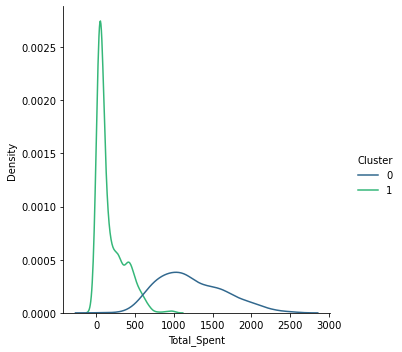

In [51]:
sns.displot(data=df, x='Total_Spent', hue='Cluster', kind='kde', palette='viridis')

In [52]:
df[df['Cluster']==0]['Total_Spent'].mean(), df[df['Cluster']==1]['Total_Spent'].mean()

(1224.72647702407, 171.33281853281852)

**Total de Compras**

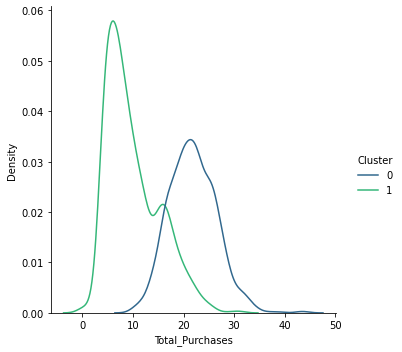

In [53]:
sns.displot(data=df, x='Total_Purchases', hue='Cluster', kind='kde', palette='viridis')

In [54]:
df[df['Cluster']==0]['Total_Purchases'].mean(), df[df['Cluster']==1]['Total_Purchases'].mean()

(21.827133479212254, 9.968339768339769)

**Idade**

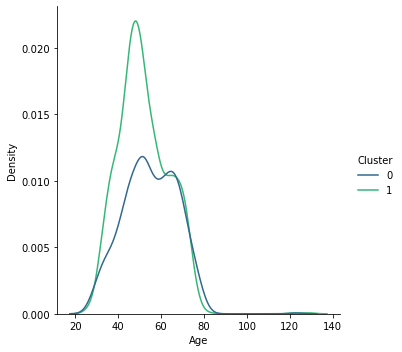

In [55]:
sns.displot(data=df, x='Age', hue='Cluster', kind='kde', palette='viridis')

In [56]:
df[df['Cluster']==0]['Age'].mean(), df[df['Cluster']==1]['Age'].mean()

(55.00437636761488, 51.91737451737452)

**Demais atributos**

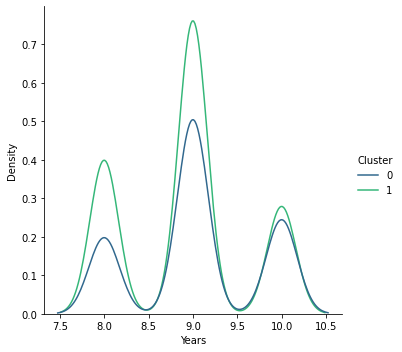

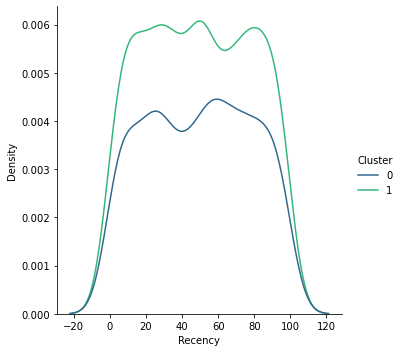

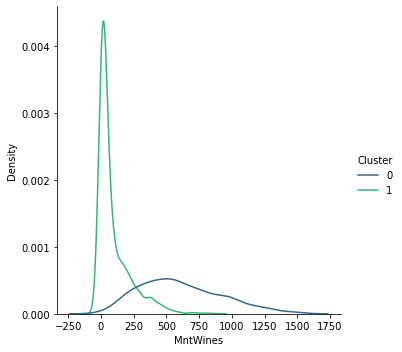

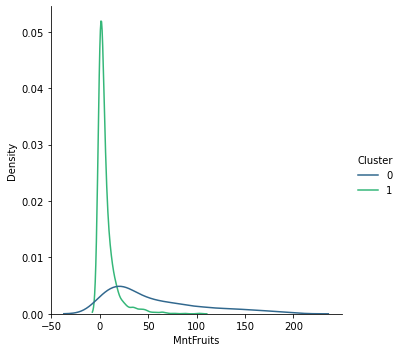

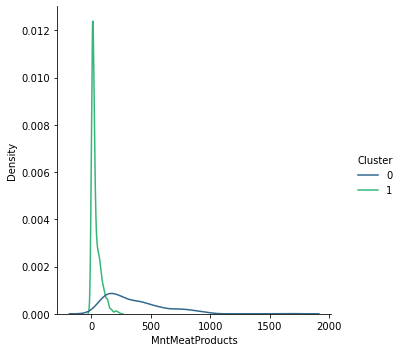

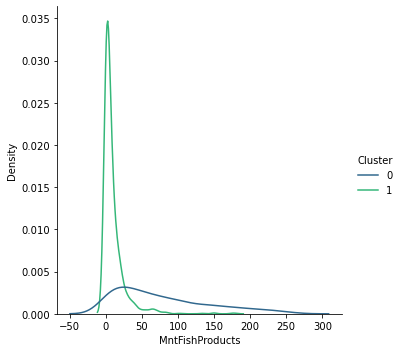

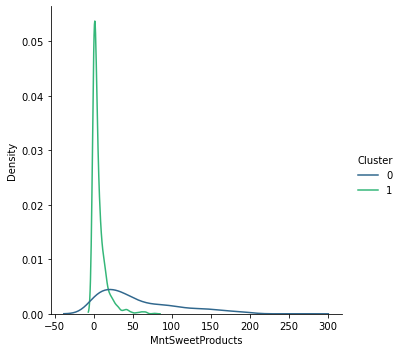

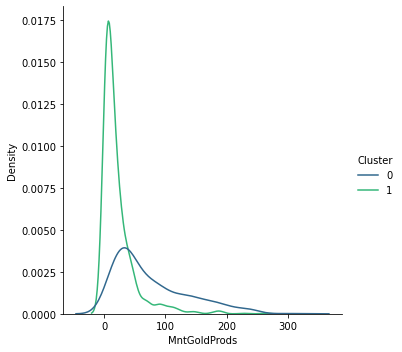

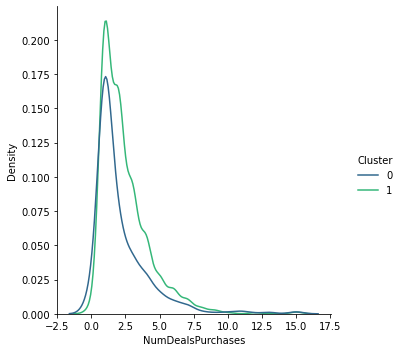

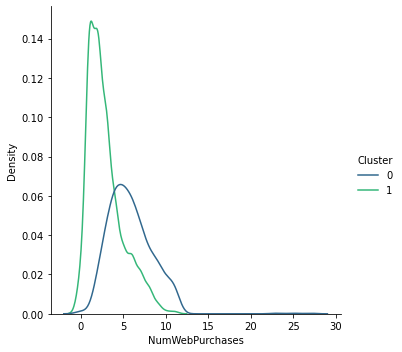

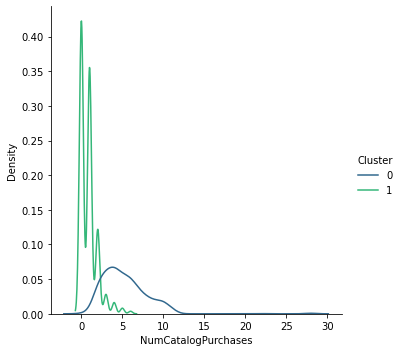

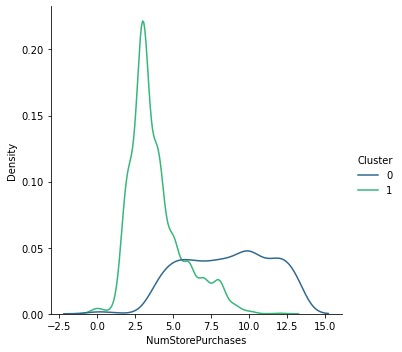

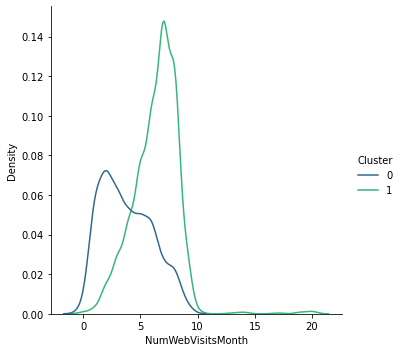

In [57]:
for i in range(4,17):
    sns.displot(data=df, x=df.columns[i], hue='Cluster', kind='kde', palette='viridis')

## 4. Determinando os perfis dos clientes

**Cluster 0**

- Normalmente não têm filhos
- 55 anos de idade, em média
- Renda anual média de cerca de 72 mil dólares
- Mais de 1200 dólares gastos no total (média nos últimos dois anos)
- Mais de 20 compras realizadas, em média
- Gastos notáveis em vinhos (600 dólares, em média, nos últimos dois anos)

**Cluster 1**

- Costumam ter um filho ou mais
- Média de cerca de 52 anos de idade
- Renda anual média de 38 mil dólares
- Menos de 200 dólares gastos no total (média nos últimos dois anos)
- Total de 10 compras realizadas, em média
- Notável número de visitas no último mês


## 5. Conclusão

O gráfico que melhor evidencia a situação dos grupos é o de renda anual em função do valor total gasto, como já mostrado:

(0.0, 100000.0)

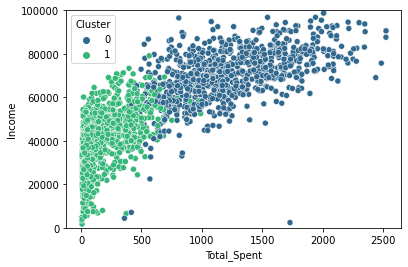

In [58]:
sns.scatterplot(data=df, y='Income', x='Total_Spent', hue='Cluster',palette='viridis')
plt.ylim(0,100000)

As características que melhor separam os clusters 0 e 1 são a renda anual e total gasto!